In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 

Using TensorFlow backend.


# 範例

In [2]:
# 第一步：選擇模型，順序模型是多個連接層的線性堆疊
model = Sequential()

# 第二層：建構網絡層
model.add(Dense(500, input_shape=(784,))) # 輸入層為28*28-784
model.add(Activation('relu')) # 激活函數是relu

model.add(Dense(500)) # 隱藏層節點500個
model.add(Activation('relu'))

model.add(Dense(500)) # 隱藏層節點500個
model.add(Activation('relu'))

model.add(Dense(500)) # 隱藏層節點500個
model.add(Activation('relu'))

model.add(Dense(10)) # 輸出結果為10個類別，所以維度是10
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數


W0721 13:56:47.760280  9160 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 13:56:47.792286  9160 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 13:56:47.796094  9160 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
# 模型建立完成後，統計參數總量
print('Total Parameters: %d' %model.count_params())

# 輸出模型摘要資訊
model.summary()

Total Parameters: 1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)          

In [4]:
# 第三步編譯
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

W0721 13:56:49.230303  9160 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 13:56:49.283236  9160 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0721 13:56:49.291573  9160 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# 第四步資料分割
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 由於mist的輸入數據維度是(num, 28, 28)，這裡需要把後面的維度直接拼起來變成784維
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10)== y_test[:, None]).astype(int)

In [6]:
# 第五步訓練
'''
fit的一些參數說明
batch_size：對總的樣本數進行分組，每組包含的樣本數量
epochs ：訓練次數
shuffle：是否把數據隨機打亂之後再進行訓練
validation_split：拿出百分之多少用來做交叉驗證
verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
'''

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train, Y_train, batch_size = 128, epochs=20, shuffle=True, verbose=1, validation_split=0.3)

W0721 13:56:53.382091  9160 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 165us/step - loss: 2.6299 - acc: 0.8348 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/20
42000/42000 [==============================] - 6s 136us/step - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/20
42000/42000 [==============================] - 6s 134us/step - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/20
42000/42000 [==============================] - 6s 139us/step - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/20
42000/42000 [==============================] - 6s 144us/step - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/20
42000/42000 [==============================] - 6s 134us/step - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/20
42000/42000 [==============================] - 7s 161us/step - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - 

In [9]:
# 第六步：輸出
print('test set')
scores = model.evaluate(X_test, Y_test, batch_size=200, verbose=0)
print('')
print('The test loss is %f', scores)
result = model.predict(X_test, batch_size=200, verbose=0)

result_max = numpy.argmax(result, axis=1)
test_max = numpy.argmax(Y_test, axis =1)

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print('')
print('The accuracy of the model is %f' %(true_num/len(result_bool)))

test set

The test loss is %f [2.8421611833572387, 0.8227000069618225]

The accuracy of the model is 0.113500


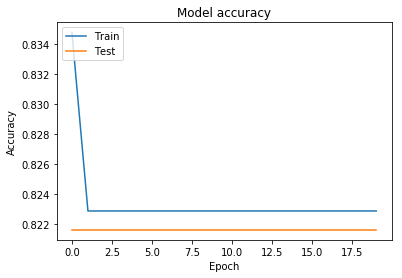

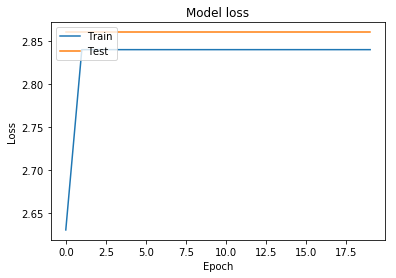

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [ ]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


## Adam

In [21]:
# 第三步：編譯, 
opt = optimizers.Adam(lr=0.001, epsilon=None, decay=0.0)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 64
epochs = 10

In [28]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/10
 - 9s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/10
 - 9s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/10
 - 9s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/10
 - 9s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216


In [29]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8421611833572387, 0.8227000069618225]

 The accuracy of the model is 0.113500 


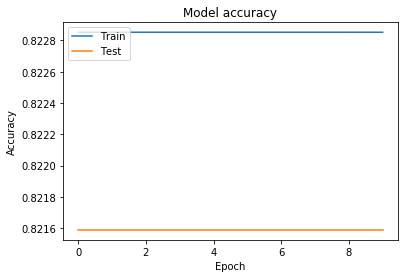

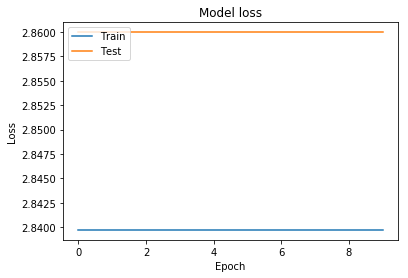

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# SGD

In [35]:
opt = 'SGD'
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/10
 - 6s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/10
 - 5s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216


In [37]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8421611833572387, 0.8227000069618225]

 The accuracy of the model is 0.113500 


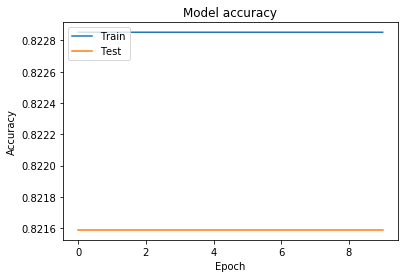

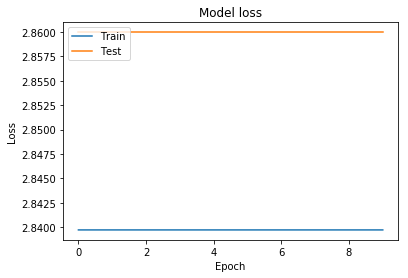

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Rmsprop

In [40]:
# 第三步：編譯, 
opt = optimizers.RMSprop(lr=0.001, epsilon=None, decay=0.0)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 4/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 5/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 6/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 7/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 8/10
 - 8s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 9/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 10/10
 - 7s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216


In [42]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.8421611833572387, 0.8227000069618225]

 The accuracy of the model is 0.113500 


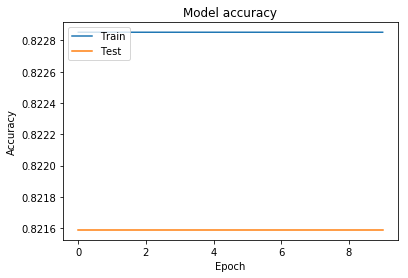

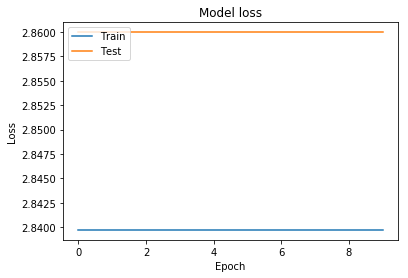

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 進階範例

In [11]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [35]:
# !pip install autograd

  Stored in directory: C:\Users\TL_Yu\AppData\Local\pip\Cache\wheels\72\6f\c2\40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
Successfully built autograd


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest

## Objective function: the Beale function

In [13]:
# Objective function: the Beale function

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)
minima = np.array([3., .5])
f(*minima)

0.0

In [14]:
minima_ = minima.reshape(-1, 1)
minima_

f(*minima_)

array([0.])

In [15]:
def target_func(weights):
    x,y = weights
    return f(x,y)

# Adam Optimizer

In [16]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [17]:
EPOCHS = 3000
SHOW_STEPS = 100
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.01)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))

start to optimize EPOCHS:3000
times:0 weights:[1.  1.5] loss:41.25
times:30 weights:[0.7371867  1.22939503] loss:20.299015115677488
times:60 weights:[0.60591868 1.04849877] loss:15.060862617226
times:90 weights:[0.58632034 0.91842752] loss:12.981397656153064
times:120 weights:[0.6502342  0.80472928] loss:11.321903656324578
times:150 weights:[0.78098643 0.69414189] loss:9.42760928272687
times:180 weights:[0.95890658 0.58512322] loss:7.2900861448751595
times:210 weights:[1.15977446 0.48274852] loss:5.207435732865861
times:240 weights:[1.36076875 0.39347367] loss:3.479710603481422
times:270 weights:[1.54570617 0.32136353] loss:2.228035884986305
times:300 weights:[1.70612102 0.26732981] loss:1.411090259141672
times:330 weights:[1.83962001 0.23008581] loss:0.9173472485588398
times:360 weights:[1.94767077 0.2072466 ] loss:0.6334829645634958
times:390 weights:[2.03377945 0.19605415] loss:0.47280443927631366
times:420 weights:[2.10220386 0.19378707] loss:0.3789137443501675
times:450 weights:[2

In [18]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[1.         0.7371867  0.60591868 0.58632034 0.6502342  0.78098643
  0.95890658 1.15977446 1.36076875 1.54570617 1.70612102 1.83962001
  1.94767077 2.03377945 2.10220386 2.15712666 2.20219283 2.24031854
  2.27368033 2.30380576 2.33170617 2.3580134  2.38309961 2.40717167
  2.43033926 2.45266007 2.47416728 2.49488466 2.51483386 2.53403729
  2.55251875 2.57030322 2.5874163  2.60388375 2.61973105 2.63498313
  2.64966421 2.66379762 2.67740575 2.69051    2.70313081 2.7152876
  2.72699887 2.73828215 2.74915411 2.75963055 2.76972647 2.77945612
  2.78883299 2.79786993 2.80657914 2.81497221 2.82306018 2.83085356
  2.83836237 2.84559617 2.85256409 2.85927487 2.86573685 2.87195804
  2.87794611 2.88370843 2.88925209 2.8945839  2.89971044 2.90463802
  2.90937277 2.9139206  2.91828721 2.92247816 2.92649882 2.93035439
  2.93404994 2.93759039 2.94098055 2.94422508 2.94732853 2.95029536
  2.95312989 2.95583637 2.95841894 2.96088166 2.96322849 2.96546332
  2.96758996 2.96961214 2.9715335  

# Visualize Convergence Trace

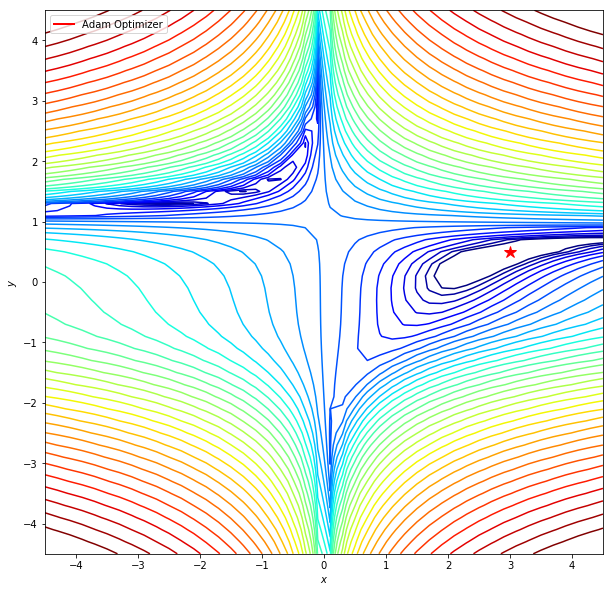

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

# 以下的片段範例需要有 ffmpeg
請務必使用 conda 指令安裝

務必確認HDD 有足夠的空間

conda install -c conda-forge ffmpeg

In [20]:
import matplotlib.animation as manimation; manimation.writers.list()

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path_trace[::,:i])
    point.set_data(*path_trace[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_trace.shape[1], interval=60, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())